In [1]:
import pandas as pd

In [2]:
weather = pd.read_csv('weather_data_oakland.csv', index_col='DATE')

In [3]:
weather.head()

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


### Cleaning the data

In [4]:
weather.isna().sum()

STATION        0
NAME           0
ACMH       11108
ACSH       11108
AWND        8812
DAPR       16944
FMTM       14762
FRGT       16950
MDPR       16944
PGTM        8441
PRCP         281
SNOW        5572
SNWD        5448
TAVG       14915
TMAX           9
TMIN          10
TSUN       15801
WDF1       11108
WDF2        8811
WDF5        8898
WDFG       12685
WSF1       11108
WSF2        8810
WSF5        8898
WSFG       12685
WT01       13213
WT02       16615
WT03       16832
WT04       16948
WT05       16924
WT07       16950
WT08       13747
WT09       16950
WT16       14997
WT18       16949
dtype: int64

In [5]:
weather.isna().sum() / weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.655262
ACSH       0.655262
AWND       0.519821
DAPR       0.999528
FMTM       0.870812
FRGT       0.999882
MDPR       0.999528
PGTM       0.497935
PRCP       0.016576
SNOW       0.328693
SNWD       0.321378
TAVG       0.879837
TMAX       0.000531
TMIN       0.000590
TSUN       0.932102
WDF1       0.655262
WDF2       0.519762
WDF5       0.524894
WDFG       0.748289
WSF1       0.655262
WSF2       0.519703
WSF5       0.524894
WSFG       0.748289
WT01       0.779436
WT02       0.980120
WT03       0.992921
WT04       0.999764
WT05       0.998348
WT07       0.999882
WT08       0.810937
WT09       0.999882
WT16       0.884674
WT18       0.999823
dtype: float64

In [6]:
core_col = weather[['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN']].copy()

In [7]:
core_col.columns = ['precip', 'snow', 'snow_depth', 'temp_max', 'temp_min']

In [8]:
core_col.head()

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0
1960-01-02,0.0,0.0,0.0,49.0,29.0
1960-01-03,0.0,0.0,0.0,54.0,35.0
1960-01-04,0.0,0.0,0.0,54.0,36.0
1960-01-05,0.0,0.0,0.0,55.0,33.0


In [9]:
core_col.isna().sum()

precip         281
snow          5572
snow_depth    5448
temp_max         9
temp_min        10
dtype: int64

In [10]:
core_col['snow'].value_counts()

0.0    11379
1.0        1
Name: snow, dtype: int64

In [11]:
del core_col['snow']

In [12]:
core_col['snow_depth'].value_counts()

0.0    11504
Name: snow_depth, dtype: int64

In [13]:
del core_col['snow_depth']

In [14]:
core_col[pd.isnull(core_col['precip'])]

,precip,temp_max,temp_min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2013-12-15,NaN,58.0,33.0
2016-05-01,NaN,80.0,55.0
2016-05-02,NaN,68.0,53.0


In [15]:
core_col.loc['1983-10-20':'1983-11-05', :]

,precip,temp_max,temp_min
DATE,,,
1983-10-20,0.00,73.0,52.0
1983-10-21,0.00,70.0,50.0
1983-10-22,0.00,70.0,50.0
1983-10-23,0.00,69.0,60.0
1983-10-24,0.00,73.0,58.0
1983-10-25,0.00,75.0,53.0
1983-10-26,0.00,79.0,53.0
1983-10-27,0.00,82.0,56.0
1983-10-28,0.00,74.0,56.0


In [16]:
core_col['precip'].value_counts()

0.00    13743
0.01      440
0.02      199
0.03      123
0.04      104
        ...  
1.29        1
1.73        1
1.05        1
1.38        1
1.02        1
Name: precip, Length: 176, dtype: int64

In [17]:
core_col['precip'] = core_col['precip'].fillna(0)

In [18]:
core_col[pd.isnull(core_col['temp_max'])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2013-06-16,0.0,NaN,NaN
2019-04-18,0.0,NaN,50.0
2019-04-21,0.0,NaN,52.0
2019-04-22,0.0,NaN,50.0
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN
2020-09-09,0.0,NaN,NaN
2021-10-31,0.0,NaN,56.0


In [19]:
core_col[pd.isnull(core_col['temp_min'])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2013-06-16,0.0,NaN,NaN
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN


In [20]:
core_col = core_col.fillna(method='ffill')

In [21]:
core_col.isnull().sum()

precip      0
temp_max    0
temp_min    0
dtype: int64

In [22]:
core_col.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [23]:
core_col.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2022-04-21', '2022-04-22', '2022-04-23', '2022-04-24', '2022-04-25',
       '2022-04-26', '2022-04-27', '2022-04-28', '2022-04-29', '2022-04-30'],
      dtype='object', name='DATE', length=16952)

In [24]:
core_col.index = pd.to_datetime(core_col.index)

In [25]:
core_col.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-04-21', '2022-04-22', '2022-04-23', '2022-04-24',
               '2022-04-25', '2022-04-26', '2022-04-27', '2022-04-28',
               '2022-04-29', '2022-04-30'],
              dtype='datetime64[ns]', name='DATE', length=16952, freq=None)

In [26]:
core_col.apply(lambda x: (x==9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

<AxesSubplot:xlabel='DATE'>

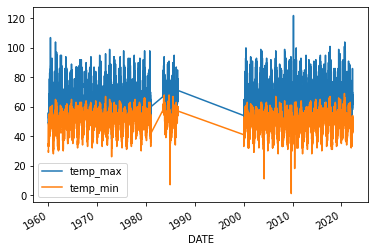

In [27]:
core_col[['temp_max', 'temp_min']].plot()

In [33]:
core_col.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    120
Name: DATE, dtype: int64

<AxesSubplot:xlabel='DATE'>

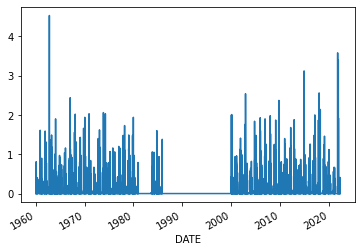

In [34]:
core_col['precip'].plot()

In [35]:
core_col.groupby(core_col.index.year)['precip'].sum()

DATE
1960    14.01
1961    13.87
1962    22.47
1963    19.11
1964    16.83
1965    16.32
1966    13.11
1967    23.98
1968    17.19
1969    25.70
1970    25.31
1971    10.61
1972    16.27
1973    29.37
1974    16.87
1975    17.54
1976     8.64
1977    11.70
1978    22.57
1979    23.79
1980    13.58
1983     7.13
1984    16.03
1985     8.50
1986     0.00
2000    21.09
2001    22.84
2002    19.12
2003    11.37
2004    12.97
2005    27.37
2006    22.79
2007    12.79
2008    13.86
2009    14.57
2010    22.67
2011    16.06
2012    22.93
2013     4.89
2014    19.62
2015     8.58
2016    19.77
2017    23.34
2018    16.82
2019    20.00
2020     6.42
2021    20.82
2022     1.85
Name: precip, dtype: float64

In [36]:
core_col['target'] = core_col.shift(-1)['temp_max']

In [37]:
core_col

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-04-26,0.0,63.0,51.0,62.0
2022-04-27,0.0,62.0,48.0,62.0
2022-04-28,0.0,62.0,47.0,68.0


In [38]:
core_col = core_col.iloc[:-1, :].copy()

In [39]:
core_col

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-04-25,0.0,67.0,47.0,63.0
2022-04-26,0.0,63.0,51.0,62.0
2022-04-27,0.0,62.0,48.0,62.0


In [40]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=0.1)

In [42]:
predictors = ['precip', 'temp_max', 'temp_min']

In [44]:
train = core_col.loc[:'2020-12-31']

In [45]:
test = core_col.loc['2021-01-01':]

In [46]:
reg.fit(train[predictors], train.target)

Ridge(alpha=0.1)

In [47]:
pred = reg.predict(test[predictors])

In [51]:
from sklearn.metrics import mean_absolute_error

In [52]:
mean_absolute_error(test.target, pred)

3.4406791161086505

In [61]:
combined = pd.concat([test.target, pd.Series(pred, index=test.index)], axis=1)
combined.columns = ['actual', 'predicted']

In [62]:
combined.head(20)

,actual,predicted
DATE,,
2021-01-01,57.0,59.806024
2021-01-02,56.0,59.310181
2021-01-03,62.0,58.538685
2021-01-04,59.0,61.531814
2021-01-05,59.0,59.444266
2021-01-06,59.0,59.018666
2021-01-07,61.0,60.163028
2021-01-08,60.0,61.964686
2021-01-09,62.0,59.266952


<AxesSubplot:xlabel='DATE'>

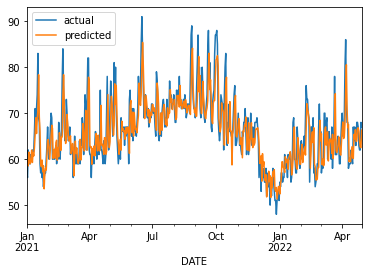

In [63]:
combined.plot()

In [64]:
reg.coef_

array([-2.20730384,  0.72113834,  0.17969047])

In [65]:
def create_prediction(predictors, core_col, reg):
    train = core_col.loc[:'2020-12-31']
    test = core_col.loc['2021-01-01':]
    reg.fit(train[predictors], train.target)
    pred = reg.predict(test[predictors])
    error = mean_absolute_error(test.target, pred)
    combined = pd.concat([test.target, pd.Series(pred, index=test.index)], axis=1)
    combined.columns = ['actual', 'predicted']
    return error, combined

In [66]:
core_col['month_max'] = core_col['temp_max'].rolling(30).mean()

In [67]:
core_col

,precip,temp_max,temp_min,target,month_max
DATE,,,,,
1960-01-01,0.0,49.0,30.0,49.0,NaN
1960-01-02,0.0,49.0,29.0,54.0,NaN
1960-01-03,0.0,54.0,35.0,54.0,NaN
1960-01-04,0.0,54.0,36.0,55.0,NaN
1960-01-05,0.0,55.0,33.0,53.0,NaN
...,...,...,...,...,...
2022-04-25,0.0,67.0,47.0,63.0,65.466667
2022-04-26,0.0,63.0,51.0,62.0,65.400000
2022-04-27,0.0,62.0,48.0,62.0,65.366667


In [68]:
core_col['month_day_max'] = core_col['month_max'] / core_col['temp_max']

In [69]:
core_col['max_min'] = core_col['temp_max'] / core_col['temp_min']

In [70]:
predictors = ['precip', 'temp_max', 'temp_min', 'month_max', 'month_day_max', 'max_min']

In [71]:
core_col = core_col.iloc[30:,:].copy()

In [72]:
error, combined = create_prediction(predictors, core_col, reg)

In [73]:
error

3.3855548785932545

<AxesSubplot:xlabel='DATE'>

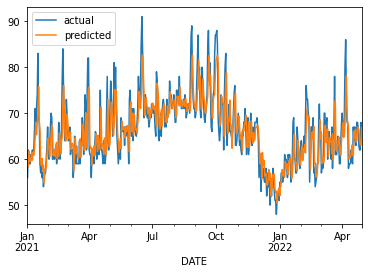

In [74]:
combined.plot()

In [75]:
core_col['monthly_avg'] = core_col['temp_max'].groupby(core_col.index.month).apply(lambda x: x.expanding(1).mean())

In [76]:
core_col

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg
DATE,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.000000
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.000000
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.500000
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.000000
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.000000
...,...,...,...,...,...,...,...,...
2022-04-25,0.00,67.0,47.0,63.0,65.466667,0.977114,1.425532,64.543060
2022-04-26,0.00,63.0,51.0,62.0,65.400000,1.038095,1.235294,64.541963
2022-04-27,0.00,62.0,48.0,62.0,65.366667,1.054301,1.291667,64.540156


In [78]:
core_col['day_of_year_avg'] = core_col['temp_max'].groupby(core_col.index.day_of_year).apply(lambda x: x.expanding(1).mean())

In [82]:
core_col

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg
DATE,,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.000000,59.000000
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.000000,62.000000
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.500000,59.000000
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.000000,59.000000
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.000000,60.000000
...,...,...,...,...,...,...,...,...,...
2022-04-25,0.00,67.0,47.0,63.0,65.466667,0.977114,1.425532,64.543060,64.404255
2022-04-26,0.00,63.0,51.0,62.0,65.400000,1.038095,1.235294,64.541963,64.936170
2022-04-27,0.00,62.0,48.0,62.0,65.366667,1.054301,1.291667,64.540156,66.404255


In [79]:
predictors = ['precip', 'temp_max', 'temp_min', 'month_max', 'month_day_max', 'max_min', 'monthly_avg', 'day_of_year_avg']

In [80]:
error, combined = create_prediction(predictors, core_col, reg)

In [81]:
error

3.3510549515669354

In [83]:
reg.coef_

array([ -0.90804013,   0.40146278,   0.03114081,   0.33672074,
       -15.97061869,   0.0493612 ,   0.14343362,   0.08006707])

In [84]:
core_col.corr()['target']

precip            -0.205102
temp_max           0.821057
temp_min           0.594287
target             1.000000
month_max          0.686017
month_day_max     -0.421597
max_min            0.045247
monthly_avg        0.688977
day_of_year_avg    0.711384
Name: target, dtype: float64

In [86]:
combined['diff'] = (combined['actual'] - combined['predicted']).abs()

In [89]:
combined.sort_values('diff', ascending=False).head(10)

,actual,predicted,diff
DATE,,,
2021-01-17,83.0,68.585837,14.414163
2021-05-07,81.0,67.774432,13.225568
2021-04-01,62.0,75.178360,13.178360
2022-03-21,78.0,65.004972,12.995028
2021-02-22,84.0,71.168844,12.831156
2021-10-16,66.0,78.823197,12.823197
2021-02-21,77.0,64.415171,12.584829
2022-04-05,80.0,67.548888,12.451112
2022-04-06,86.0,74.031554,11.968446
